In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [47]:
asia   = pd.read_pickle('Asia_Joiner')
amazon = pd.read_pickle('Amazon_Joiner')
africa = pd.read_pickle('Africa_Joiner')

asia_sif   = pd.read_pickle('Asia_new')
amazon_sif = pd.read_pickle('Amazon_new')
africa_sif = pd.read_pickle('Africa_new')


,Year,Month,Day,lat/lon G2A,lat/lon G2B,FsA,FsB,VZA G2A,VZA G2B,CF G2A,CF G2b
0,2012,12,13,"(3.777953, 26.924114)","(3.842749, 26.924495)",-0.000558775,0.00247552,0.937304,0.625585,0.305781,0.225937
1,2012,12,13,"(3.42805, 26.84802)","(3.490921, 26.843642)",-0.000968062,0.00138064,0.937056,0.626045,0.228891,0.23809
2,2012,12,13,"(3.078575, 26.769957)","(3.138603, 26.765193)",0.000702715,0.000436331,0.937064,0.626049,0.245711,0.20577
3,2012,12,13,"(2.728342, 26.695208)","(2.787209, 26.682614)",0.000144029,0.000420625,0.937329,0.625596,0.351306,0.232114
4,2012,12,13,"(-0.562172, 26.667046)","(-0.526071, 26.665401)",0.00195168,0.00240213,0.885413,0.699355,0.295196,0.117692


In [40]:
a = (np.abs(amazon['FsA'] - amazon['FsB'])).std()
b = ((amazon['FsA'] - amazon['FsB'])).mean()
c = np.median((np.abs(amazon['FsA'] - amazon['FsB'])))
print a,b,c

0.697946930274 -0.211774707283 0.840551555157


In [62]:
amazon_joi = amazon.reindex(index=range(amazon.shape[0]),method='bfill')
africa_joi = africa.reindex(index=range(africa.shape[0]),method='bfill')
asia_joi   = asia.reindex(index=range(asia.shape[0]),method='bfill')

asia_sif   = asia_sif.reindex(index=range(asia_sif.shape[0]),method='bfill')
amazon_sif = amazon_sif.reindex(index=range(amazon_sif.shape[0]),method='bfill')
africa_sif = africa_sif.reindex(index=range(africa_sif.shape[0]),method='bfill')
#amazon_sif['Month'].plot(kind='hist')

In [63]:
#SIFTER filtering
am_sif = amazon_sif[['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']].apply(pd.to_numeric, errors='ignore') 
af_sif = africa_sif[['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']].apply(pd.to_numeric, errors='ignore') 
as_sif = asia_sif[['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']].apply(pd.to_numeric, errors='ignore')

am_sif['VZA G2A'] = np.rad2deg(am_sif['VZA G2A']) 
am_sif['VZA G2B'] = np.rad2deg(am_sif['VZA G2B']) 

af_sif['VZA G2A'] = np.rad2deg(af_sif['VZA G2A']) 
af_sif['VZA G2B'] = np.rad2deg(af_sif['VZA G2B']) 

as_sif['VZA G2A'] = np.rad2deg(as_sif['VZA G2A']) 
as_sif['VZA G2B'] = np.rad2deg(as_sif['VZA G2B']) 

#am_sif = am_sif.loc[(am_sif['Year']==2013) & (am_sif['Month']>2),['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']]

In [65]:
am_sif.head()

,Year,Month,Day,FsA,FsB,VZA G2A,VZA G2B,CF G2A,CF G2b
0,2012,12,24,0.003402,0.001764,35.846687,53.660691,0.316163,0.339586
1,2012,12,24,0.001342,0.000652,35.848993,53.663852,0.380794,0.336535
2,2012,12,24,0.004571,0.002248,35.823181,53.664352,0.276770,0.271489
3,2012,12,24,0.003508,0.001423,35.823541,53.664864,0.337683,0.195070
4,2012,12,24,0.002511,0.000031,35.850076,53.665388,0.267475,0.176044


In [69]:
# SIFTER filtering

am_sif_a = am_sif.loc[(am_sif['VZA G2A']<am_sif['VZA G2B']),['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']]
am_sif_b = am_sif.loc[(am_sif['VZA G2B']<am_sif['VZA G2A']),['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']]
af_sif_a = af_sif.loc[(af_sif['VZA G2A']<af_sif['VZA G2B']),['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']]
af_sif_b = af_sif.loc[(af_sif['VZA G2B']<af_sif['VZA G2A']),['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']]
as_sif_a = as_sif.loc[(as_sif['VZA G2A']<as_sif['VZA G2B']),['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']]
as_sif_b = as_sif.loc[(as_sif['VZA G2B']<as_sif['VZA G2A']),['Year','Month','Day','FsA','FsB','VZA G2A','VZA G2B','CF G2A','CF G2b']]

# joiner filtering
am_a = amazon_joi.loc[(amazon_joi['VZA G2A']<0),['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                       'VZA G2A','VZA G2B','CF G2A','CF G2b']]

am_b = amazon_joi.loc[(amazon_joi['VZA G2B']<0),['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                       'VZA G2A','VZA G2B','CF G2A','CF G2b']]

af_a = africa_joi.loc[(africa_joi['VZA G2A']<0),['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                       'VZA G2A','VZA G2B','CF G2A','CF G2b']]

af_b = africa_joi.loc[(africa_joi['VZA G2B']<0),['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                       'VZA G2A','VZA G2B','CF G2A','CF G2b']]

as_a = asia_joi.loc[(asia_joi['VZA G2A']<0),['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                       'VZA G2A','VZA G2B','CF G2A','CF G2b']]

as_b = asia_joi.loc[(asia_joi['VZA G2B']<0),['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                       'VZA G2A','VZA G2B','CF G2A','CF G2b']]

amazonA = am_a[['FsA','FsB','FsA_un','FsB_un']].apply(pd.to_numeric, errors='ignore') #GOMEA from the west
amazonB = am_b[['FsA','FsB','FsA_un','FsB_un']].apply(pd.to_numeric, errors='ignore') #GOMEB from the west
africaA = af_a[['FsA','FsB','FsA_un','FsB_un']].apply(pd.to_numeric, errors='ignore') #GOMEA from the west
africaB = af_b[['FsA','FsB','FsA_un','FsB_un']].apply(pd.to_numeric, errors='ignore') #GOMEB from the west
asiaA   = as_a[['FsA','FsB','FsA_un','FsB_un']].apply(pd.to_numeric, errors='ignore') #GOMEA from the west
asiaB   = as_b[['FsA','FsB','FsA_un','FsB_un']].apply(pd.to_numeric, errors='ignore') #GOMEB from the west


JOINER


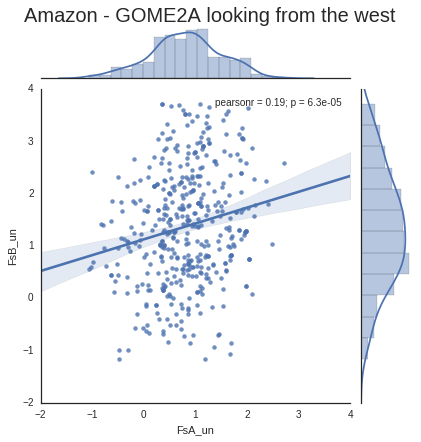

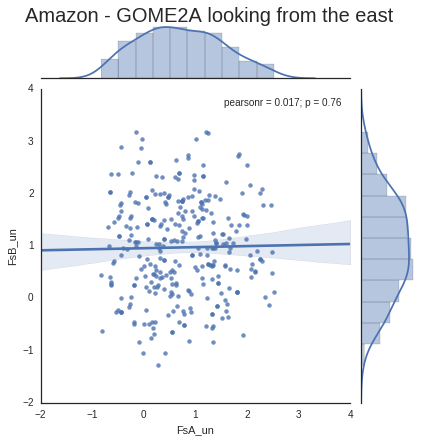

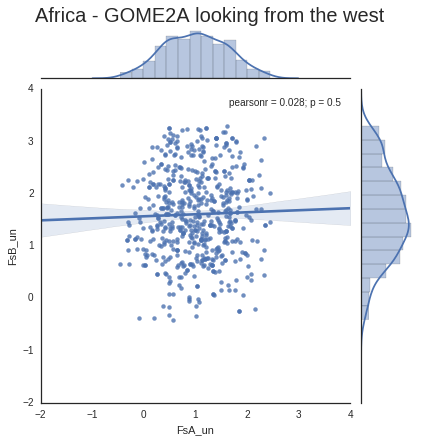

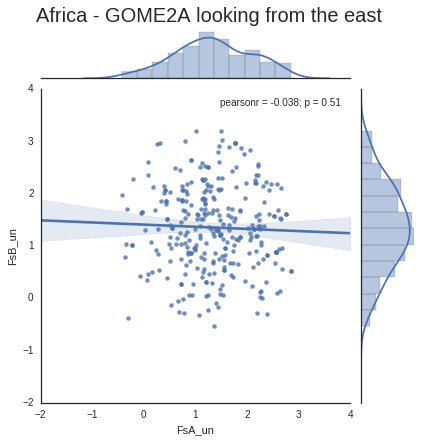

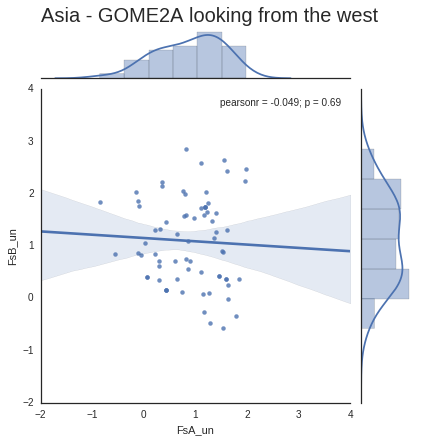

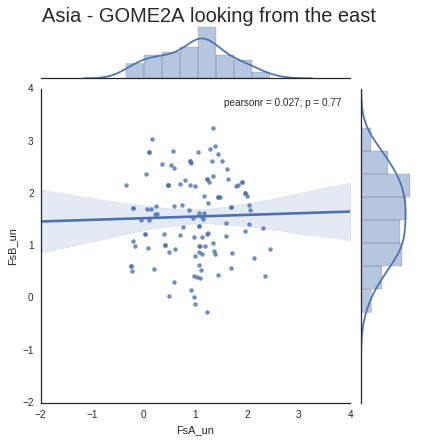

In [73]:
sns.set_style('white')
ax  = sns.jointplot(amazonA['FsA_un'],amazonA['FsB_un'],kind='reg')
ax.fig.suptitle('Amazon - GOME2A looking from the west', verticalalignment='baseline', fontsize=20)
plt.xlim(-2,4)
plt.ylim(-2,4)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_ama.png',bbox_inches='tight',DPI=1000)

ax  = sns.jointplot(amazonB['FsA_un'],amazonB['FsB_un'],kind='reg')
ax.fig.suptitle('Amazon - GOME2A looking from the east', verticalalignment='baseline', fontsize=20)
plt.xlim(-2,4)
plt.ylim(-2,4)

sns.set_style('white')
ax  = sns.jointplot(africaA['FsA_un'],africaA['FsB_un'],kind='reg')
ax.fig.suptitle('Africa - GOME2A looking from the west', verticalalignment='baseline', fontsize=20)
plt.xlim(-2,4)
plt.ylim(-2,4)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_ama.png',bbox_inches='tight',DPI=1000)

ax  = sns.jointplot(africaB['FsA_un'],africaB['FsB_un'],kind='reg')
ax.fig.suptitle('Africa - GOME2A looking from the east', verticalalignment='baseline', fontsize=20)
plt.xlim(-2,4)
plt.ylim(-2,4)

sns.set_style('white')
ax  = sns.jointplot(asiaA['FsA_un'],asiaA['FsB_un'],kind='reg')
ax.fig.suptitle('Asia - GOME2A looking from the west', verticalalignment='baseline', fontsize=20)
plt.xlim(-2,4)
plt.ylim(-2,4)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_ama.png',bbox_inches='tight',DPI=1000)

ax  = sns.jointplot(asiaB['FsA_un'],asiaB['FsB_un'],kind='reg')
#ax  = sns.lmplot('FsA','FsB',amazon.apply(pd.to_numeric,errors='ignore'))
ax.fig.suptitle('Asia - GOME2A looking from the east', verticalalignment='baseline', fontsize=20)
plt.xlim(-2,4)
plt.ylim(-2,4)

print 'JOINER'
plt.show()

SIFTER


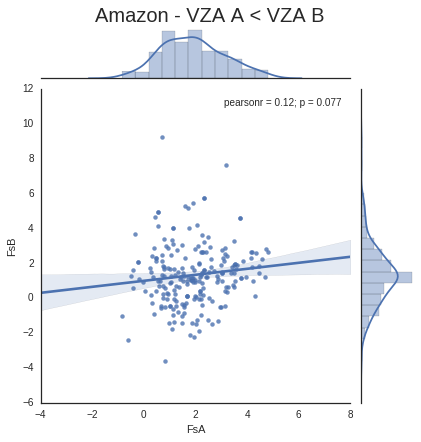

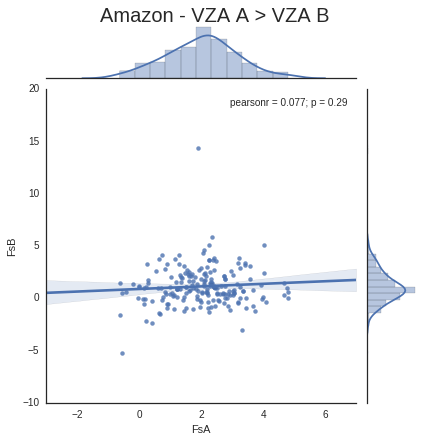

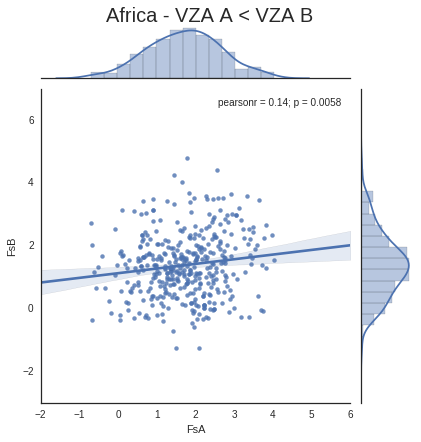

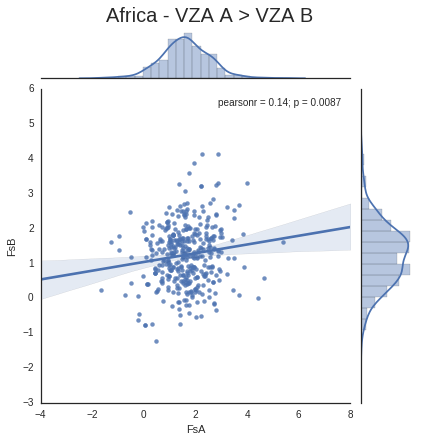

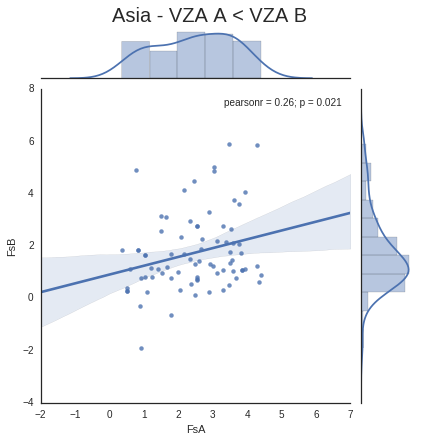

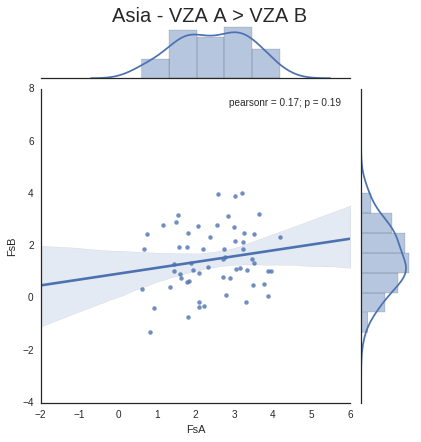

In [83]:
sns.set_style('white')
ax  = sns.jointplot(am_sif_a['FsA']*1000,am_sif_a['FsB']*1000,kind='reg')
ax.fig.suptitle('Amazon - VZA A < VZA B', verticalalignment='baseline', fontsize=20)
#plt.xlim(-2,4)
#plt.ylim(-2,4)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_ama.png',bbox_inches='tight',DPI=1000)

ax  = sns.jointplot(am_sif_b['FsA']*1000,am_sif_b['FsB']*1000,kind='reg')
ax.fig.suptitle('Amazon - VZA A > VZA B', verticalalignment='baseline', fontsize=20)
#plt.xlim(-2,4)
#plt.ylim(-2,4)

sns.set_style('white')
ax  = sns.jointplot(af_sif_a['FsA']*1000,af_sif_a['FsB']*1000,kind='reg')
ax.fig.suptitle('Africa - VZA A < VZA B', verticalalignment='baseline', fontsize=20)
#plt.xlim(-2,4)
#plt.ylim(-2,4)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_ama.png',bbox_inches='tight',DPI=1000)

ax  = sns.jointplot(af_sif_b['FsA']*1000,af_sif_b['FsB']*1000,kind='reg')
ax.fig.suptitle('Africa - VZA A > VZA B', verticalalignment='baseline', fontsize=20)
#plt.xlim(-2,4)
#plt.ylim(-2,4)

sns.set_style('white')
ax  = sns.jointplot(as_sif_a['FsA']*1000,as_sif_a['FsB']*1000,kind='reg')
ax.fig.suptitle('Asia - VZA A < VZA B', verticalalignment='baseline', fontsize=20)
#plt.xlim(-2,4)
#plt.ylim(-2,4)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_ama.png',bbox_inches='tight',DPI=1000)

ax  = sns.jointplot(as_sif_b['FsA']*1000,as_sif_b['FsB']*1000,kind='reg')
ax.fig.suptitle('Asia - VZA A > VZA B', verticalalignment='baseline', fontsize=20)
#plt.xlim(-2,4)
#plt.ylim(-2,4)

print 'SIFTER'
plt.show()

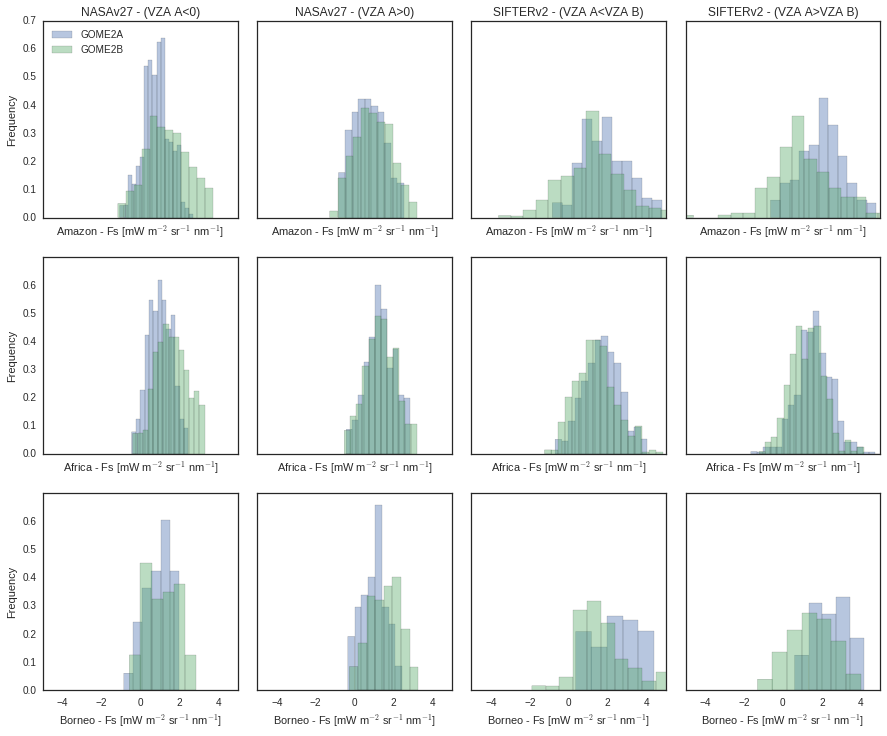

In [135]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3,4)

sns.set_style('white')
f = plt.figure(1,figsize(15,12))

ax = plt.subplot(gs[0, 0])
ax = sns.distplot(amazonA['FsA_un'],kde=False,norm_hist=True,label='GOME2A')
ax = sns.distplot(amazonA['FsB_un'],kde=False,norm_hist=True,label='GOME2B')
plt.title("NASAv27 - (VZA A<0)")
plt.xlabel('Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.xlim(-5,5)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[0, 1])
ax = sns.distplot(amazonB['FsA_un'],kde=False,norm_hist=True)
ax = sns.distplot(amazonB['FsB_un'],kde=False,norm_hist=True)
plt.title("NASAv27 - (VZA A>0)")
plt.xlabel('Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.ylim(0,0.7)
plt.xlim(-5,5)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[0, 2])
ax = sns.distplot(am_sif_a['FsA']*1000,kde=False,norm_hist=True)
ax = sns.distplot(am_sif_a['FsB']*1000,kde=False,norm_hist=True)
plt.title("SIFTERv2 - (VZA A<VZA B)")
plt.xlabel('Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.ylim(0,0.7)
plt.xlim(-5,5)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[0, 3])
ax = sns.distplot(am_sif_b['FsA']*1000,kde=False,norm_hist=True)
ax = sns.distplot(am_sif_b['FsB']*1000,kde=False,norm_hist=True)
plt.title("SIFTERv2 - (VZA A>VZA B)")
plt.xlabel('Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.ylim(0,0.7)
plt.xlim(-5,5)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[1, 0])
ax = sns.distplot(africaA['FsA_un'],kde=False,norm_hist=True)
ax = sns.distplot(africaA['FsB_un'],kde=False,norm_hist=True)
plt.xlabel('Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.ylabel('Frequency')
plt.xlim(-5,5)
plt.ylim(0,0.7)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[1, 1])
ax = sns.distplot(africaB['FsA_un'],kde=False,norm_hist=True)
ax = sns.distplot(africaB['FsB_un'],kde=False,norm_hist=True)
plt.xlabel('Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.xlim(-5,5)
plt.ylim(0,0.7)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[1, 2])
ax = sns.distplot(af_sif_a['FsA']*1000,kde=False,norm_hist=True)
ax = sns.distplot(af_sif_a['FsB']*1000,kde=False,norm_hist=True)
plt.xlabel('Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.xlim(-5,5)
plt.ylim(0,0.7)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[1, 3])
ax = sns.distplot(af_sif_b['FsA']*1000,kde=False,norm_hist=True)
ax = sns.distplot(af_sif_b['FsB']*1000,kde=False,norm_hist=True)
plt.xlabel('Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.xlim(-5,5)
plt.ylim(0,0.7)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[2, 0])
ax = sns.distplot(asiaA['FsA_un'],kde=False,norm_hist=True)
ax = sns.distplot(asiaA['FsB_un'],kde=False,norm_hist=True)
plt.xlabel('Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.ylabel('Frequency')
plt.xlim(-5,5)
plt.ylim(0,0.7)

ax = plt.subplot(gs[2, 1])
ax = sns.distplot(asiaB['FsA_un'],kde=False,norm_hist=True)
ax = sns.distplot(asiaB['FsB_un'],kde=False,norm_hist=True)
plt.xlabel('Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.subplots_adjust(wspace=0.1,hspace=0.4)
plt.xlim(-5,5)
plt.ylim(0,0.8)
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[2, 2])
ax = sns.distplot(as_sif_a['FsA']*1000,kde=False,norm_hist=True)
ax = sns.distplot(as_sif_a['FsB']*1000,kde=False,norm_hist=True)
plt.xlabel('Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.xlim(-5,5)
plt.ylim(0,0.8)
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[2, 3])
ax = sns.distplot(as_sif_b['FsA']*1000,kde=False,norm_hist=True)
ax = sns.distplot(as_sif_b['FsB']*1000,kde=False,norm_hist=True)
plt.xlabel('Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
plt.xlim(-5,5)
plt.ylim(0,0.8)
plt.setp(ax.get_yticklabels(), visible=False)

plt.subplots_adjust(wspace=0.1,hspace=0.2)
f.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/Anistrop_hist',bbox_inches='tight',DPI=1000)
plt.show()

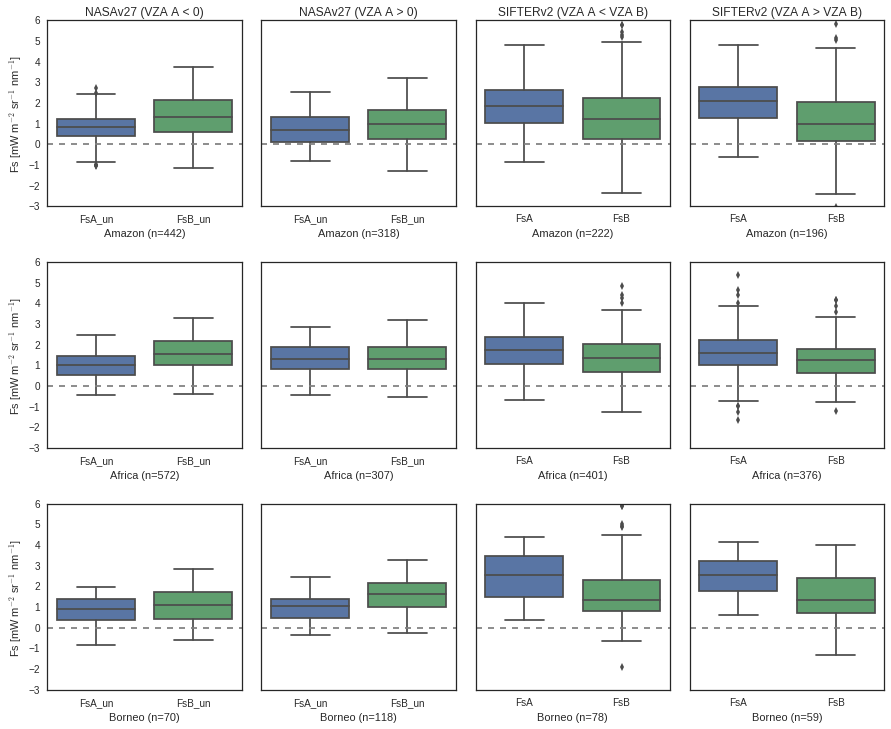

In [130]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3,4)

sns.set_style('white')
f = plt.figure(1,figsize(15,12))

ax = plt.subplot(gs[0, 0])
ax = sns.boxplot((amazonA[['FsA_un','FsB_un']]))
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Amazon (n=%i)'%amazonA.shape[0])
ax.set_title('NASAv27 (VZA A < 0)')
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)

ax = plt.subplot(gs[0, 1])
ax = sns.boxplot((amazonB[['FsA_un','FsB_un']]))
ax.set(xlabel='Amazon (n=%i)'%amazonB.shape[0])
ax.set_title('NASAv27 (VZA A > 0)')
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

ax = plt.subplot(gs[0, 2])
ax = sns.boxplot((am_sif_a[['FsA','FsB']]*1000))
ax.set(xlabel='Amazon (n=%i)'%am_sif_a.shape[0])
ax.set_title('SIFTERv2 (VZA A < VZA B)')
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

ax = plt.subplot(gs[0, 3])
ax = sns.boxplot((am_sif_b[['FsA','FsB']]*1000))
ax.set(xlabel='Amazon (n=%i)'%am_sif_b.shape[0])
ax.set_title('SIFTERv2 (VZA A > VZA B)')
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

ax = plt.subplot(gs[1, 0])
ax = sns.boxplot((africaA[['FsA_un','FsB_un']]))
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Africa (n=%i)'%africaA.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)

ax = plt.subplot(gs[1, 1])
ax = sns.boxplot((africaB[['FsA_un','FsB_un']]))
ax.set(xlabel='Africa (n=%i)'%africaB.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

ax = plt.subplot(gs[1, 2])
ax = sns.boxplot((af_sif_a[['FsA','FsB']]*1000))
ax.set(xlabel='Africa (n=%i)'%af_sif_a.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

ax = plt.subplot(gs[1, 3])
ax = sns.boxplot((af_sif_b[['FsA','FsB']]*1000))
ax.set(xlabel='Africa (n=%i)'%af_sif_b.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

ax = plt.subplot(gs[2, 0])
ax = sns.boxplot((asiaA[['FsA_un','FsB_un']]))
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Borneo (n=%i)'%asiaA.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)

ax = plt.subplot(gs[2, 1])
ax = sns.boxplot((asiaB[['FsA_un','FsB_un']]))
ax.set(xlabel='Borneo (n=%i)'%asiaB.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

ax = plt.subplot(gs[2, 2])
ax = sns.boxplot((as_sif_a[['FsA','FsB']]*1000))
ax.set(xlabel='Borneo (n=%i)'%as_sif_a.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

ax = plt.subplot(gs[2, 3])
ax = sns.boxplot((as_sif_b[['FsA','FsB']]*1000))
ax.set(xlabel='Borneo (n=%i)'%as_sif_b.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.setp(ax.get_yticklabels(), visible=False)
plt.ylim(-3,6)

plt.subplots_adjust(wspace=0.1,hspace=0.3)
f.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/Anistrop_box',bbox_inches='tight',DPI=1000)
plt.show()

In [56]:
a,b = stats.ttest_ind(amazonA['FsA'],amazonA['FsB'])
c,d = stats.ttest_ind(amazonB['FsA'],amazonB['FsB'])
print a,b,amazonA['FsA'].mean(),amazonA['FsB'].mean()
print c,d,amazonB['FsA'].mean(),amazonB['FsB'].mean()

-5.5942366257 2.95677903756e-08 0.985422217215 1.32401262805
-2.42213676755 0.0157089044145 0.769973240008 0.933625501531


In [40]:
a,b = stats.ttest_ind(africaA['FsA'],africaA['FsB'])
c,d = stats.ttest_ind(africaB['FsA'],africaB['FsB'])
print a,b
print c,d

-8.78336559623 5.70365545023e-18
-0.104708653599 0.916641301644


In [42]:
a,b = stats.ttest_ind(asiaA['FsA'],asiaA['FsB'])
c,d = stats.ttest_ind(asiaB['FsA'],asiaB['FsB'])
print a,b
print c,d

0.417785740301 0.676753106262
-2.23086950665 0.0266383273946


In [136]:
a,b = stats.ttest_ind(as_sif_a['FsA'],as_sif_a['FsB'])
c,d = stats.ttest_ind(as_sif_b['FsA'],as_sif_b['FsB'])
print a,b
print c,d

3.45385265704 0.000713933888647
4.81834285134 4.42032409674e-06


In [137]:
a,b = stats.ttest_ind(af_sif_a['FsA'],af_sif_a['FsB'])
c,d = stats.ttest_ind(af_sif_b['FsA'],af_sif_b['FsB'])
print a,b
print c,d

4.78821426836 2.00471246581e-06
5.50959285627 4.94653356593e-08


In [138]:
a,b = stats.ttest_ind(am_sif_a['FsA'],am_sif_a['FsB'])
c,d = stats.ttest_ind(am_sif_b['FsA'],am_sif_b['FsB'])
print a,b
print c,d

4.04758803053 6.10913520969e-05
5.71933004856 2.13123385134e-08


In [46]:
negative_fs = amazon_joi.loc[(amazon_joi['FsA_un']<0),['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                                               'VZA G2A','VZA G2B','CF G2A','CF G2b']]
negative_fs = negative_fs.apply(pd.to_numeric)
negative_fs['CF G2A'].describe()

count    116.000000
mean       0.207131
std        0.099726
min        0.015720
25%        0.123967
50%        0.205007
75%        0.290157
max        0.388616
Name: CF G2A, dtype: float64

In [44]:
negative_fs = amazon_joi.loc[(amazon_joi['FsA_un']>0),['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                                               'VZA G2A','VZA G2B','CF G2A','CF G2b']]
negative_fs = negative_fs.apply(pd.to_numeric)
negative_fs['CF G2A'].describe()

count    644.000000
mean       0.158378
std        0.109504
min        0.011545
25%        0.062582
50%        0.131305
75%        0.248677
max        0.399133
Name: CF G2A, dtype: float64

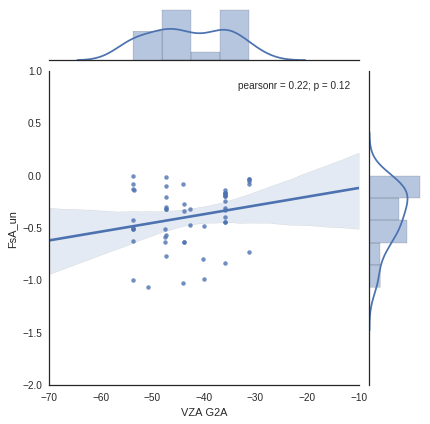

In [47]:
vza_pos = negative_fs['VZA G2A'].loc[negative_fs['VZA G2A']<0]
fs_pos  = negative_fs['FsA_un'].loc[negative_fs['VZA G2A']<0]
sns.jointplot(vza_pos,fs_pos,kind='reg')

In [6]:
threshold  = 15

test       =  pd.DataFrame(index=range(100),columns=['Year','Month','Day','lat/lon G2A','lat/lon G2B','FsA','FsA_un',
                                                     'Qf_A','FsB','FsB_un','Qf_B','VZA G2A','VZA G2B','CF G2A','CF G2b'])
cont = 0
matched    = amazon

print matched.shape

for i in range(0,matched.shape[0]):
    vzaa = matched.loc[i,'VZA G2A']
    vzab = matched.loc[i,'VZA G2B']
    check = abs(vzaa) - abs(vzab)
    
    #print vzaa,vzab,check
    
    if check < threshold: 
        test.loc[cont] = pd.Series({'Year':matched.loc[i,'Year'], 'Month':matched.loc[i,'Month'],
                                     'Day':matched.loc[i,'Day'], 'lat/lon G2A':matched.loc[i,'lat/lon G2A'],
                                     'lat/lon G2B':matched.loc[i,'lat/lon G2B'],
                                     'FsA':matched.loc[i,'FsA'],'FsA_un':matched.loc[i,'FsA_un'],
                                     'Qf_A':matched.loc[i,'Qf_A'],'FsB':matched.loc[i,'FsB'],
                                     'FsB_un':matched.loc[i,'FsB_un'],'Qf_B':matched.loc[i,'Qf_B'],
                                     'VZA G2A':matched.loc[i,'VZA G2A'],'VZA G2B':matched.loc[i,'VZA G2B'],
                                     'CF G2A':matched.loc[i,'CF G2A'],'CF G2b':matched.loc[i,'CF G2b']
                                    })
        cont += 1
        
print 'done',test.shape


(760, 15)
done (674, 15)
